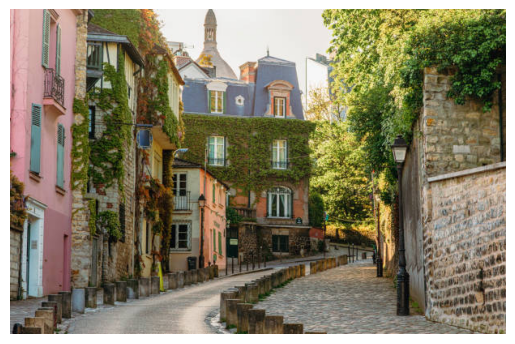

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Read the image
img = Image.open('paris.jpg')  
# Display the image
plt.imshow(img)
plt.axis('off')  
plt.show()

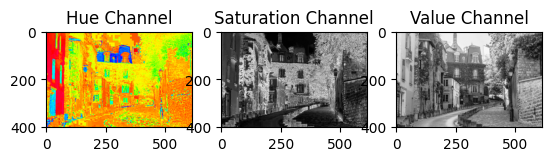

In [19]:
# Convert to HSV color space
hsv_image = img.convert('HSV')
hsv_array = np.array(hsv_image)

# Display each channel
plt.figure()
plt.subplot(1, 3, 1), plt.imshow(hsv_array[:, :, 0], cmap='hsv'), plt.title('Hue Channel')
plt.subplot(1, 3, 2), plt.imshow(hsv_array[:, :, 1], cmap='gray'), plt.title('Saturation Channel')
plt.subplot(1, 3, 3), plt.imshow(hsv_array[:, :, 2], cmap='gray'), plt.title('Value Channel')
plt.show()

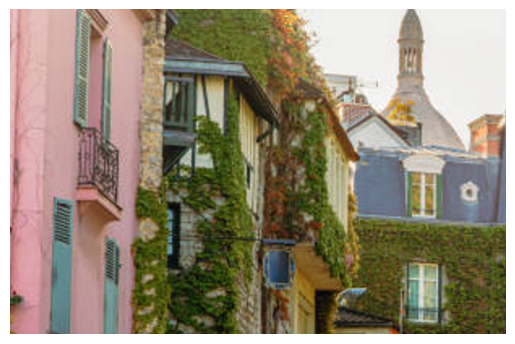

In [20]:
# Enlarge the image
enlarged_img = img.resize((img.width * 2, img.height * 2))
# Crop the enlarged image back to original size
cropped_img = enlarged_img.crop((0, 0, img.width, img.height))
plt.imshow(cropped_img)
plt.axis('off')
plt.show()

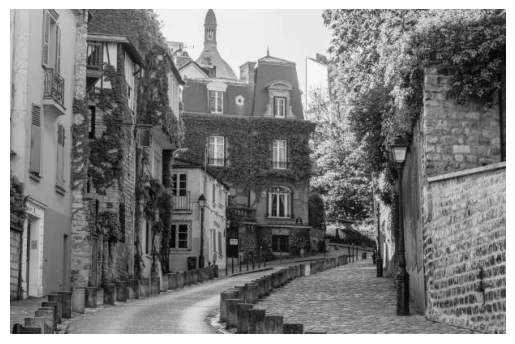

In [21]:
# Convert the image to grayscale
gray_img = img.convert('L')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

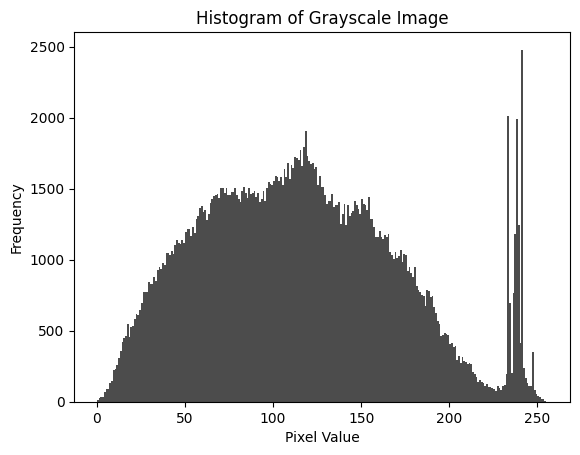

In [22]:
# Generate and display histogram
plt.figure()
plt.hist(np.array(gray_img).ravel(), bins=256, range=[0, 256], alpha=0.7, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

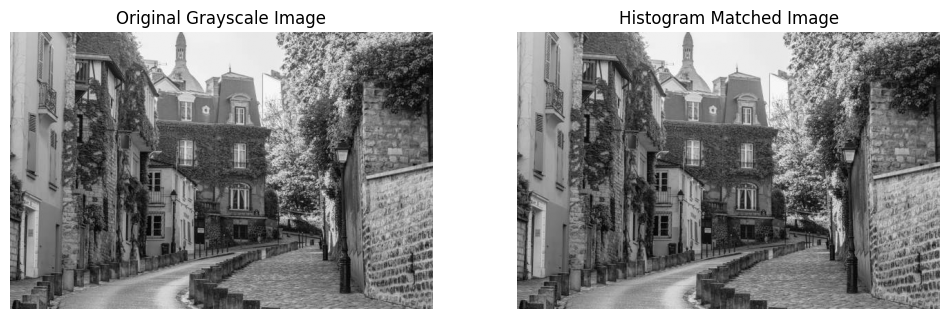

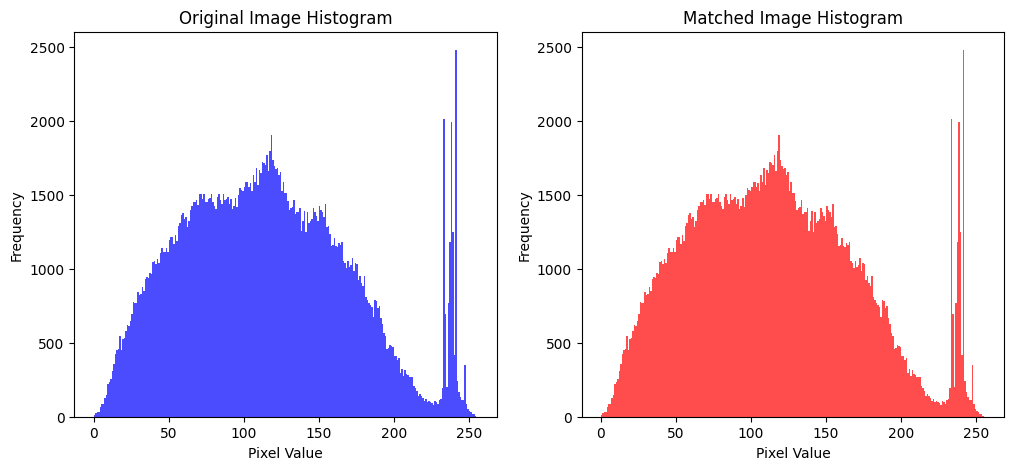

In [23]:
def histogram_matching(reference, image):
    """
    Histogram matching function that maps the histogram of 'image' to match 'reference'
    
    Args:
        reference: Reference image (file path string, PIL Image, or numpy array)
        image: Source image to be transformed (file path string, PIL Image, or numpy array)
    
    Returns:
        PIL Image with histogram matched to reference
    """
    # Handle different input types for reference
    if isinstance(reference, str):
        # File path
        reference = Image.open(reference)
    elif isinstance(reference, np.ndarray):
        # Numpy array
        reference = Image.fromarray(reference)
    
    # Handle different input types for image
    if isinstance(image, str):
        # File path
        image = Image.open(image)
    elif isinstance(image, np.ndarray):
        # Numpy array
        image = Image.fromarray(image)
    
    # Convert both to grayscale
    reference = reference.convert('L')
    image = image.convert('L')
    
    # Convert to numpy arrays
    reference = np.array(reference)
    image = np.array(image)
    
    # Compute histograms
    ref_hist, _ = np.histogram(reference.flatten(), bins=256, range=[0, 256])
    img_hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Compute CDFs and normalize to [0, 1]
    ref_cdf = ref_hist.cumsum()
    ref_cdf_normalized = ref_cdf / ref_cdf[-1]  # Proper normalization to [0,1]
    
    img_cdf = img_hist.cumsum()
    img_cdf_normalized = img_cdf / img_cdf[-1]  # Proper normalization to [0,1]
    
    # Create mapping from source CDF to reference CDF
    # For each pixel value in source, find corresponding value in reference
    mapping = np.zeros(256, dtype=np.uint8)
    
    for i in range(256):
        # Find the closest reference CDF value to source CDF[i]
        diff = np.abs(ref_cdf_normalized - img_cdf_normalized[i])
        mapping[i] = np.argmin(diff)
    
    # Apply the mapping to transform the image
    matched_image = mapping[image]
    
    return Image.fromarray(matched_image)


# Test histogram matching with the same image (should be similar to original)
matched_img = histogram_matching(gray_img, gray_img)  

# Display original and matched images side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(matched_img, cmap='gray')
plt.title('Histogram Matched Image')
plt.axis('off')
plt.show()

# Display histograms to show the matching
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(np.array(gray_img).ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue', label='Original')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.array(matched_img).ravel(), bins=256, range=[0, 256], alpha=0.7, color='red', label='Matched')
plt.title('Matched Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

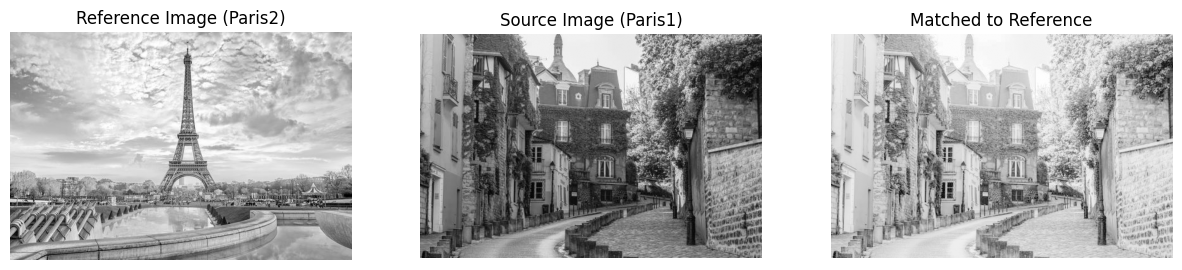

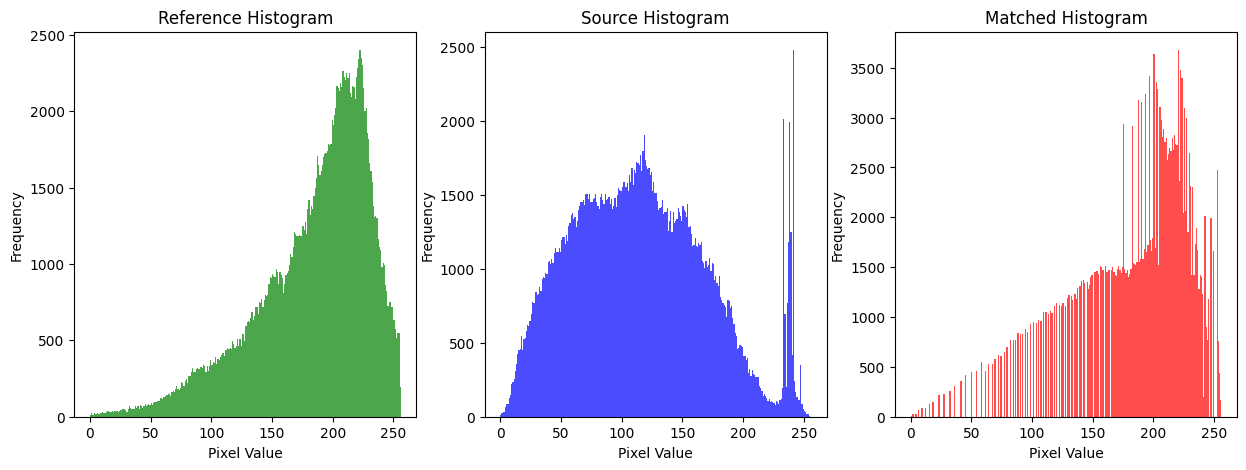


=== Demonstration: Using File Paths Directly ===


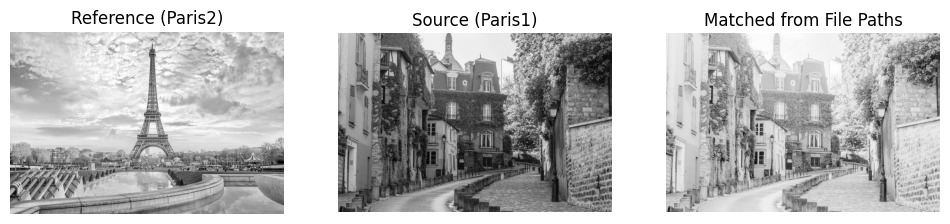


=== Additional Test: Reverse Histogram Matching ===


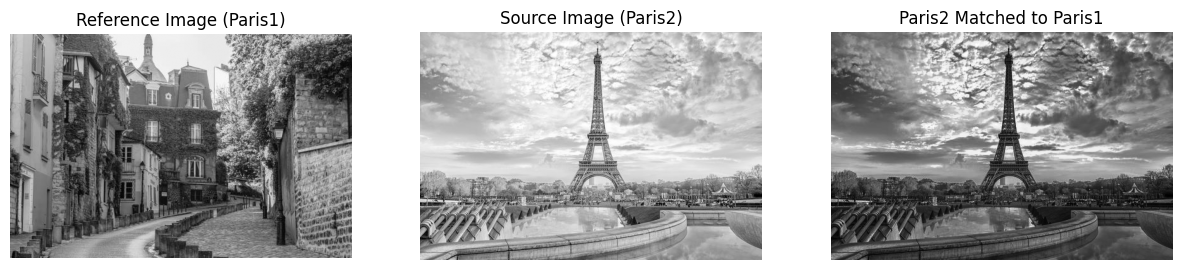

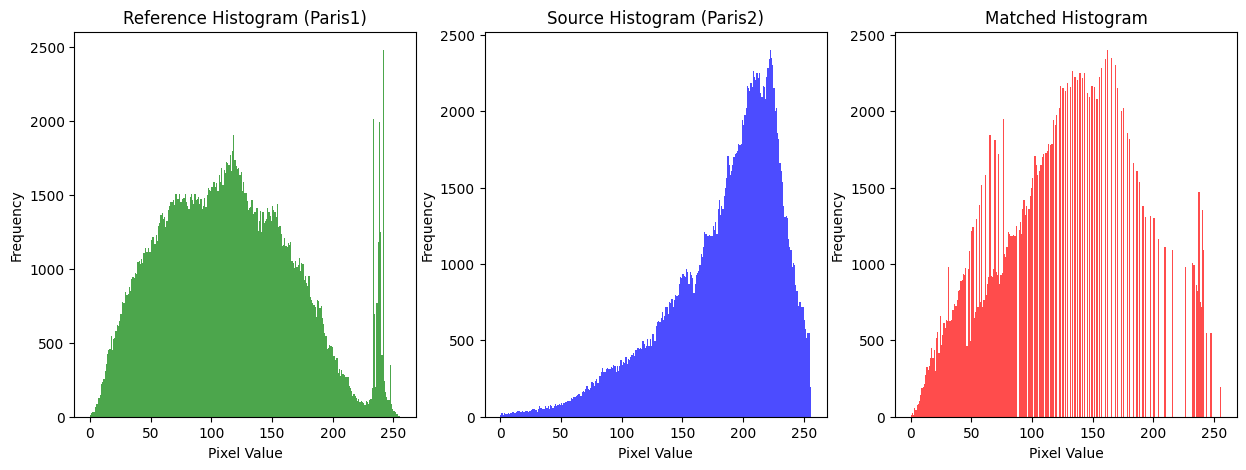

In [24]:
# Test histogram matching with two different images
# Load the second image
img2 = Image.open('paris2.jpg')
gray_img2 = img2.convert('L')

# Apply histogram matching: make paris1 match the histogram of paris2
# The function now handles file paths, PIL Images, or numpy arrays directly
matched_to_reference = histogram_matching(gray_img2, gray_img)

# Display the test
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img2, cmap='gray')
plt.title('Reference Image (Paris2)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Source Image (Paris1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_to_reference, cmap='gray')
plt.title('Matched to Reference')
plt.axis('off')

plt.show()

# Show histograms comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(np.array(gray_img2).ravel(), bins=256, range=[0, 256], alpha=0.7, color='green')
plt.title('Reference Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.array(gray_img).ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue')
plt.title('Source Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(np.array(matched_to_reference).ravel(), bins=256, range=[0, 256], alpha=0.7, color='red')
plt.title('Matched Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

# Demonstrate using file paths directly in histogram matching function
print("\n=== Demonstration: Using File Paths Directly ===")
# The function can now accept file paths directly
matched_from_files = histogram_matching('paris2.jpg', 'paris.jpg')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(Image.open('paris2.jpg').convert('L'), cmap='gray')
plt.title('Reference (Paris2)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Image.open('paris.jpg').convert('L'), cmap='gray')
plt.title('Source (Paris1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_from_files, cmap='gray')
plt.title('Matched from File Paths')
plt.axis('off')
plt.show()

# Additional test: Reverse the matching (Paris1 as reference, Paris2 as source)
print("\n=== Additional Test: Reverse Histogram Matching ===")
# Use paris1 as reference and paris2 as source
matched_reverse = histogram_matching(gray_img, gray_img2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Reference Image (Paris1)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_img2, cmap='gray')
plt.title('Source Image (Paris2)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_reverse, cmap='gray')
plt.title('Paris2 Matched to Paris1')
plt.axis('off')

plt.show()

# Show histograms for reverse matching
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(np.array(gray_img).ravel(), bins=256, range=[0, 256], alpha=0.7, color='green')
plt.title('Reference Histogram (Paris1)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.array(gray_img2).ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue')
plt.title('Source Histogram (Paris2)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(np.array(matched_reverse).ravel(), bins=256, range=[0, 256], alpha=0.7, color='red')
plt.title('Matched Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()


In [25]:
# Save all result images
gray_img.save('grayscale_image.png')
cropped_img.save('cropped_image.png')
matched_img.save('matched_image.png')
matched_to_reference.save('histogram_matched_image.png')
matched_reverse.save('histogram_matched_reverse.png')

print("All images saved successfully!")
print("- grayscale_image.png: Original grayscale image (Paris1)")
print("- cropped_image.png: Enlarged and cropped image")
print("- matched_image.png: Histogram matched to itself")
print("- histogram_matched_image.png: Paris1 matched to Paris2 histogram")
print("- histogram_matched_reverse.png: Paris2 matched to Paris1 histogram")  

All images saved successfully!
- grayscale_image.png: Original grayscale image (Paris1)
- cropped_image.png: Enlarged and cropped image
- matched_image.png: Histogram matched to itself
- histogram_matched_image.png: Paris1 matched to Paris2 histogram
- histogram_matched_reverse.png: Paris2 matched to Paris1 histogram
